<a href="https://www.kaggle.com/code/faryalrifaz3374/diabetes-classification-eda-5-ml-models?scriptVersionId=268297548" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Author: Faryal Rifaz**

---

# **Diabetes classification using machine learning models**

---

## Stay Connected!

 If you found this notebook helpful or interesting, don't forget to **upvote** and **follow** me for more beginner-friendly, practical notebooks.
 
#### Let’s connect and grow together on this learning journey.



### Email: faryalrifaz3374@gmail.com
### [LinkedIn](https://www.linkedin.com/in/faryal-rifaz-b8a885304/)
### [Github](https://github.com/Faryalrifaz)


![Diabetes](https://cdn.pixabay.com/photo/2014/11/12/19/25/diabetes-528678__480.jpg "Understanding Diabetes")


#  Step 1: Import libraries

First of all we need to import all the necessary libraries. 

In [88]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Step 2: Import Dataset

Now we will load the diabetes dataset and take a look at its structure to understand the columns, data types, and first few records


In [89]:

data = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Step 3: Check info & missing values

Now let's check the quick info and see how many missing values are the data set .

In [90]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [91]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Step 4: Data Preprocessing

In [92]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Replace zero values with median (for specific columns)
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols:
    data[col] = data[col].replace(0, data[col].median())

# 2. Split features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 3. Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Balance the dataset using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Step 5: Get Basic Statistics

let's have a view of the Basic Statistics 

In [93]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Step 5:  Exploratory Data Analysis (EDA)

let's have some Distributions and patterns from data.

### **1. Distribution of Outcome** 

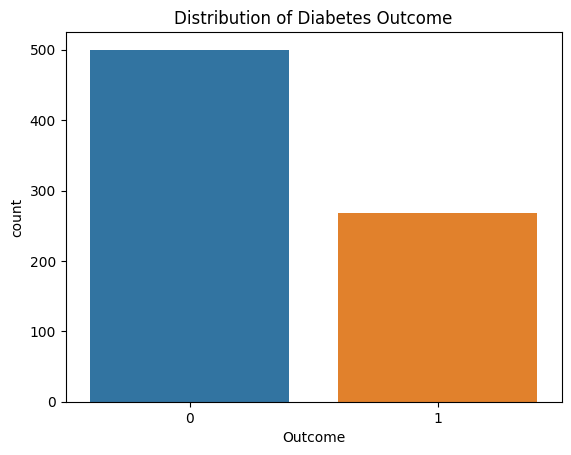

In [94]:
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Diabetes Outcome')
plt.show()

The distribution of the diabetes outcome shows the count of patients with (1) and without (0) diabetes.


### **2. Correlation Matrix**

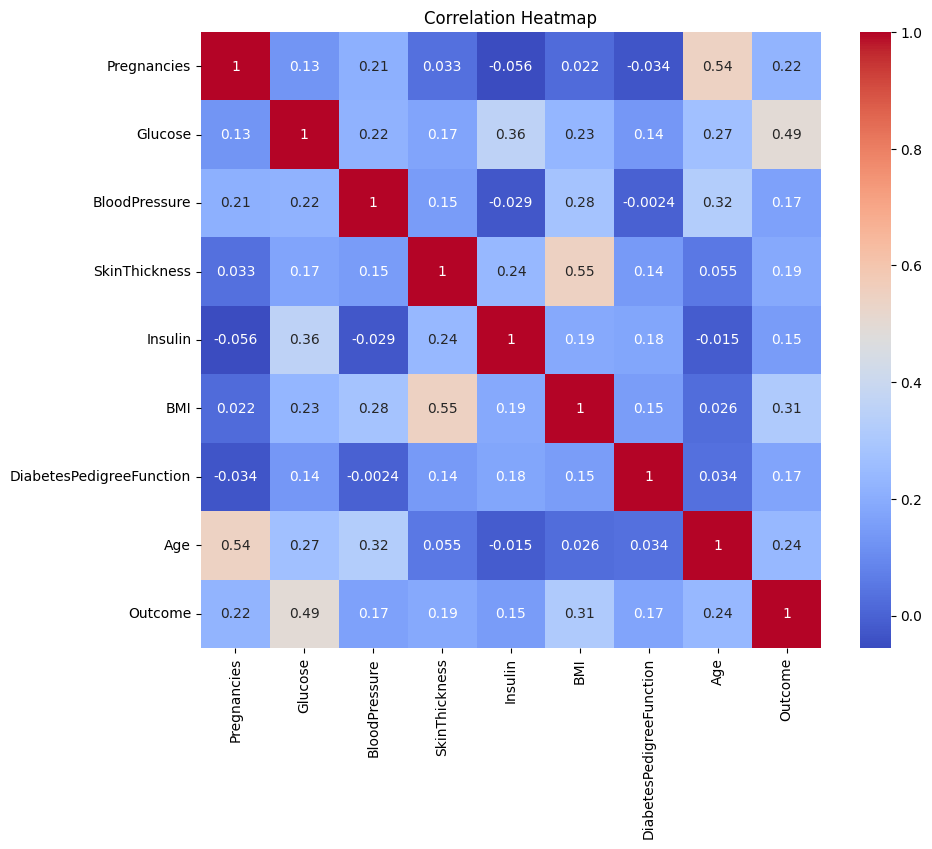

In [95]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **3. Distribution of numerical features**

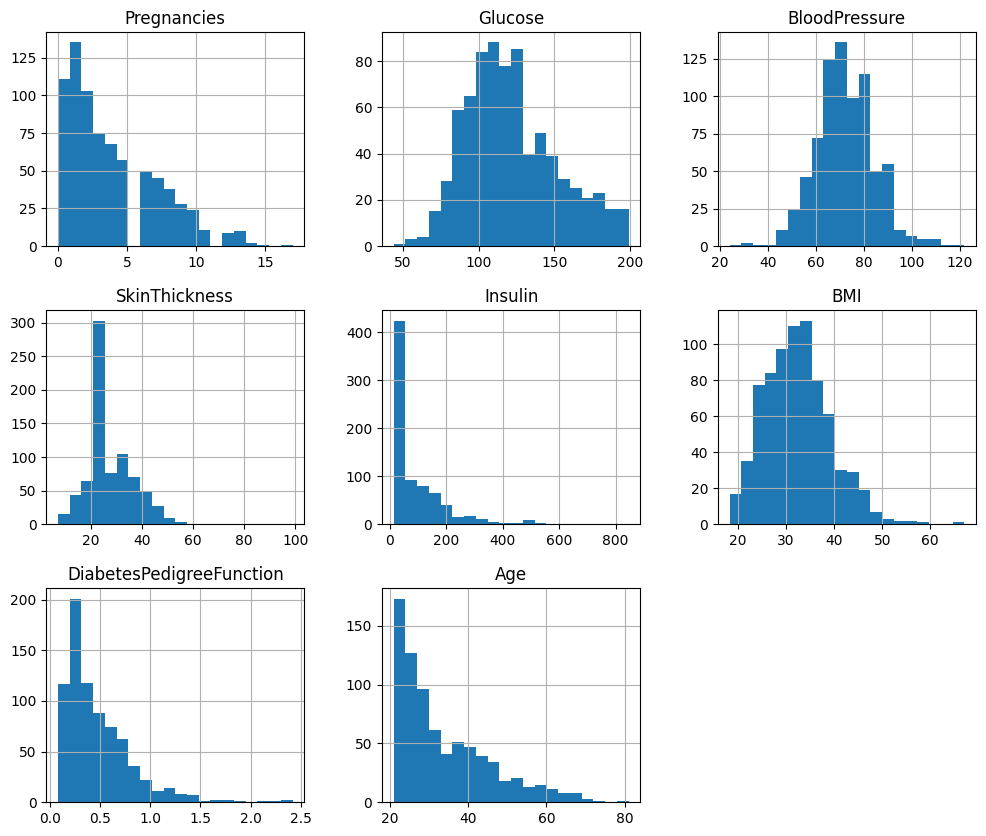

In [96]:
num_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data[num_cols].hist(figsize=(12,10), bins=20)
plt.show()

### **4. Boxplots to check outliers**


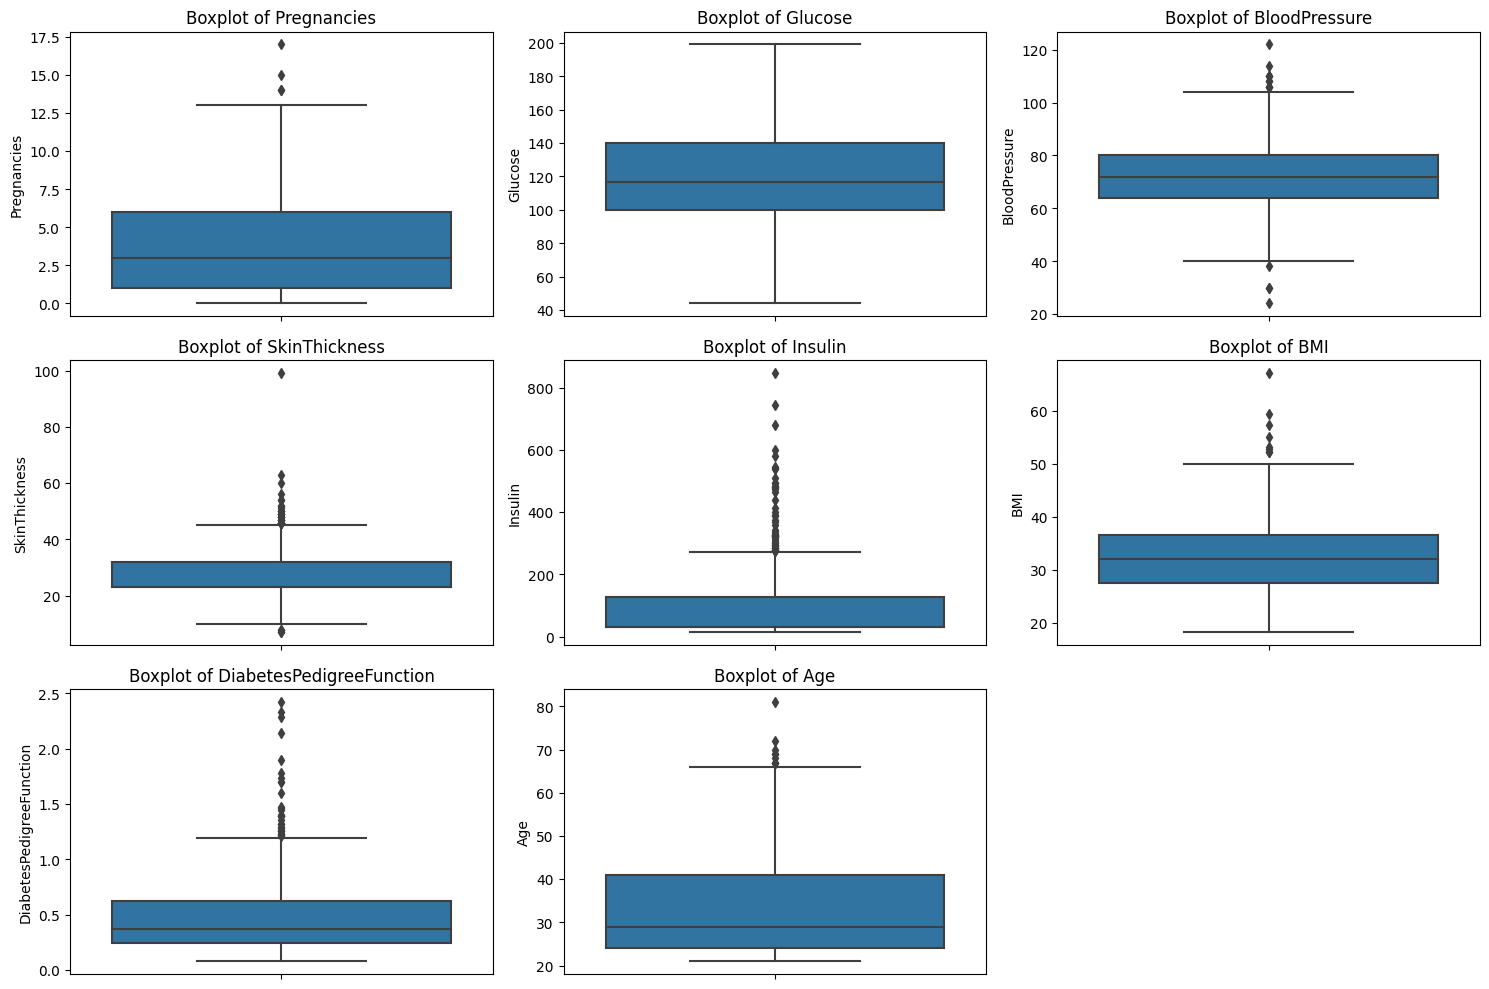

In [97]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Step 6: Split the data into X and y

In [98]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Step 7: Split the data into training and testing sets

Let's split the data for training and testing.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Step 8: Apply ML Models

Now it's time to apply Machine Learning models.

In [100]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}


# Step 9: Evaluate the models

let's evaluate the models.

In [101]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-"*60)
    results.append([name, acc])

Model: Random Forest
Accuracy: 0.7749
Confusion Matrix:
[[124  27]
 [ 25  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       151
           1       0.67      0.69      0.68        80

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.78      0.77      0.78       231

------------------------------------------------------------
Model: SVM
Accuracy: 0.7359
Confusion Matrix:
[[123  28]
 [ 33  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231

------------------------------------------------------------
Model: KNN
Accuracy: 0.6753
Co

In [102]:
# Display all results together
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(results_df)

           Model  Accuracy
0  Random Forest  0.774892
1            SVM  0.735931
2            KNN  0.675325
3    Naive Bayes  0.731602
4            MLP  0.705628


Let's check through some visuals

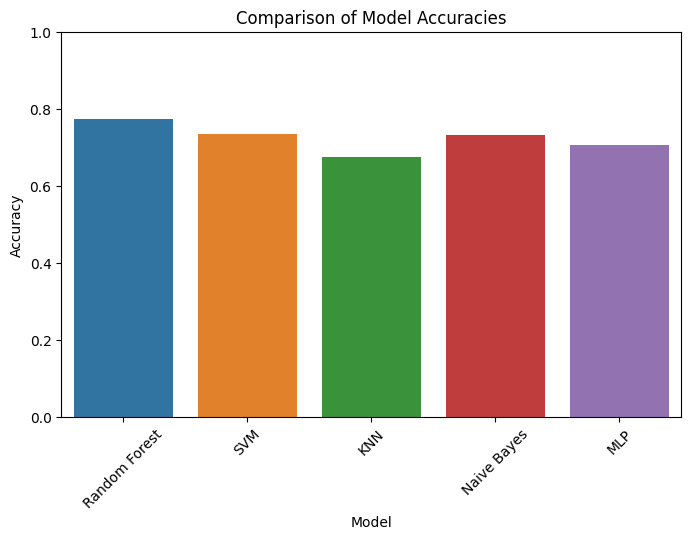

In [103]:
# Bar plot for model comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()


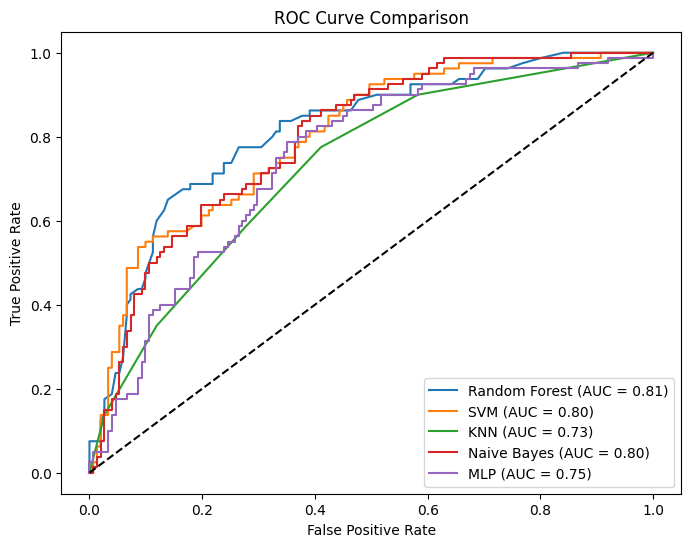

In [104]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Step 10: Conclusion

Among the five models applied on the diabetes dataset, the Random Forest Classifier achieved the highest accuracy of 0.77, followed by SVM (0.74) and Naive Bayes (0.73).
The KNN performed the lowest with 0.67, while MLP reached 0.70.
Overall, Random Forest proved most suitable for diabetes prediction due to its ability to handle complex features and reduce overfitting.

---